In [30]:
# Name: RuiMing Li 
# Homework 5 


In [31]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import datetime as dt 

In [32]:
#load data from a csv file
aviation_df = pd.read_csv('aviation_data.csv', delimiter = '|')

#inspect the dimensons
print('There are {} rows and {} columns.'.format(aviation_df.shape[0], aviation_df.shape[1]))

There are 85627 rows and 32 columns.


In [33]:
# exracting the following columns: Broad Phase of Flight, Total Uninjured, Total Minor Injuries, 
# Total Serious Injuries, Total Fatal Injuries, Air Carrier, Make, Model, Aircraft Category, Aircraft Damage, 
# Injury Severity, Country, Event Date, Investigation Type, Event Id.

#view samples of the data
aviation_df.head()

# print(aviation_df)
# aviation_df = aviation_df['Broad Phase of Flight', 'Total Uninjured, Total Minor Injuries', 
#                           'Total Serious Injuries', 'Total Fatal Injuries, Air Carrier', 'Make', 'Model', 'Aircraft Category', 
#                           'Aircraft Damage', 'Injury Severity', 'Country', 'Event Date', 'Investigation Type', 'Event Id']
# #print(aviation_df)


,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date,
0,20200922X85131,Accident,CEN20LA412,09/20/2020,"Montrose, MO",United States,38.250000,-93.890000,,N/A,...,,,,,1,VMC,CRUISE,Preliminary,09/24/2020,
1,20200920X32151,Accident,WPR20CA313,09/19/2020,"Somerton, AZ",United States,32.557222,-114.684166,AZ25,Tri-Rotor Ag Services,...,,,,,1,,,Preliminary,09/23/2020,
2,20200922X81021,Accident,CEN20WA408,09/19/2020,"Moosburg, Germany",Germany,,,,,...,,2,,,,,MANEUVERING,Foreign,,
3,20200921X81023,Accident,CEN20CA405,09/18/2020,"Huntley, IL",United States,42.221111,-88.417778,6IL2,Phyllis Field,...,,,,,1,VMC,,Preliminary,09/21/2020,
4,20200921X15712,Accident,CEN20CA411,09/17/2020,"Marksville, LA",United States,31.094722,-92.069167,MKV,,...,,,,,,,,Preliminary,09/23/2020,


In [34]:
aviation_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85627 entries, 0 to 85626
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Event Id                  85627 non-null  object
 1    Investigation Type       85627 non-null  object
 2    Accident Number          85627 non-null  object
 3    Event Date               85627 non-null  object
 4    Location                 85627 non-null  object
 5    Country                  85627 non-null  object
 6    Latitude                 85627 non-null  object
 7    Longitude                85627 non-null  object
 8    Airport Code             85627 non-null  object
 9    Airport Name             85627 non-null  object
 10   Injury Severity          85627 non-null  object
 11   Aircraft Damage          85627 non-null  object
 12   Aircraft Category        85627 non-null  object
 13   Registration Number      85627 non-null  object
 14   Make                 

In [35]:
#check the frequency of null values in each column
aviation_df.isnull().sum()

Event Id                    0
 Investigation Type         0
 Accident Number            0
 Event Date                 0
 Location                   0
 Country                    0
 Latitude                   0
 Longitude                  0
 Airport Code               0
 Airport Name               0
 Injury Severity            0
 Aircraft Damage            0
 Aircraft Category          0
 Registration Number        0
 Make                       0
 Model                      0
 Amateur Built              0
 Number of Engines          0
 Engine Type                0
 FAR Description            0
 Schedule                   0
 Purpose of Flight          0
 Air Carrier                0
 Total Fatal Injuries       0
 Total Serious Injuries     0
 Total Minor Injuries       0
 Total Uninjured            0
 Weather Condition          0
 Broad Phase of Flight      0
 Report Status              0
 Publication Date           0
                            0
dtype: int64

In [36]:
# remove the last row with all empty 
# Broad Phase of Flight, 
aviation_df = aviation_df.drop(columns = ' ')
aviation_df = aviation_df.drop(columns = ' Accident Number ')
aviation_df = aviation_df.drop(columns = ' Location ')
aviation_df = aviation_df.drop(columns = ' Latitude ')
aviation_df = aviation_df.drop(columns = ' Airport Code ')
aviation_df = aviation_df.drop(columns = ' Airport Name ')
aviation_df = aviation_df.drop(columns = ' Registration Number ')
aviation_df = aviation_df.drop(columns = ' Amateur Built ')
aviation_df = aviation_df.drop(columns = ' Number of Engines ')
aviation_df = aviation_df.drop(columns = ' Engine Type ')
aviation_df = aviation_df.drop(columns = ' FAR Description ')
aviation_df = aviation_df.drop(columns = ' Schedule ')
aviation_df = aviation_df.drop(columns = ' Purpose of Flight ')
aviation_df = aviation_df.drop(columns = ' Weather Condition ')
aviation_df = aviation_df.drop(columns = ' Report Status ')
aviation_df = aviation_df.drop(columns = ' Publication Date ')
aviation_df = aviation_df.drop(columns = ' Longitude ')

aviation_df.isnull().sum()

Event Id                    0
 Investigation Type         0
 Event Date                 0
 Country                    0
 Injury Severity            0
 Aircraft Damage            0
 Aircraft Category          0
 Make                       0
 Model                      0
 Air Carrier                0
 Total Fatal Injuries       0
 Total Serious Injuries     0
 Total Minor Injuries       0
 Total Uninjured            0
 Broad Phase of Flight      0
dtype: int64

In [37]:
# replace spaces with null 
aviation_df = aviation_df.replace(r'^\s*$', np.nan, regex=True)
aviation_df.head()

,Event Id,Investigation Type,Event Date,Country,Injury Severity,Aircraft Damage,Aircraft Category,Make,Model,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Broad Phase of Flight
0,20200922X85131,Accident,09/20/2020,United States,Non-Fatal,Substantial,Airplane,ZENITH,CH 750,NaN,NaN,NaN,NaN,1,CRUISE
1,20200920X32151,Accident,09/19/2020,United States,Non-Fatal,Destroyed,Airplane,Air Tractor,AT 402,NaN,NaN,NaN,NaN,1,NaN
2,20200922X81021,Accident,09/19/2020,Germany,Fatal(2),Destroyed,Airplane,RAVEN AIRCRAFT CORPPRATION,RAVEN,NaN,2,NaN,NaN,NaN,MANEUVERING
3,20200921X81023,Accident,09/18/2020,United States,Non-Fatal,Substantial,Airplane,Piper,PA28,NaN,NaN,NaN,NaN,1,NaN
4,20200921X15712,Accident,09/17/2020,United States,Unavailable,Substantial,Airplane,Cessna,R182,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#check the frequency of null values in each column
aviation_df.isnull().sum()

Event Id                        0
 Investigation Type            11
 Event Date                     0
 Country                      507
 Injury Severity                0
 Aircraft Damage             2922
 Aircraft Category          56738
 Make                          68
 Model                         96
 Air Carrier                81357
 Total Fatal Injuries       28330
 Total Serious Injuries     31077
 Total Minor Injuries       29840
 Total Uninjured            15170
 Broad Phase of Flight       6632
dtype: int64

In [39]:
aviation_df.isnull().sum(axis=1).sort_values(ascending = False) 
#count the frequency of missing values in each row (i.e. how many columns are empty)


26821    11
11845    10
14536    10
19573    10
18065    10
         ..
82366     0
85237     0
82231     0
82232     0
82975     0
Length: 85627, dtype: int64

In [40]:
#Handle missing data -- deletion
aviation_df = aviation_df.dropna()
print(aviation_df)

             Event Id   Investigation Type    Event Date          Country   \
1236   20191018X02019             Accident    10/17/2019    United States    
1725   20190721X02950             Accident    07/19/2019    United States    
3942   20180417X23642             Accident    04/17/2018    United States    
11606  20130707X83745             Accident    07/06/2013    United States    
21119  20080702X00971             Accident    05/10/2008    United States    
...                ...                  ...           ...              ...   
85584  20020917X02156             Accident    01/05/1982    United States    
85586  20020917X01906             Accident    01/05/1982    United States    
85589  20020917X01651             Accident    01/05/1982    United States    
85592  20020917X02254             Accident    01/04/1982    United States    
85613  20020917X01657             Accident    01/02/1982    United States    

       Injury Severity   Aircraft Damage   Aircraft Category   

In [41]:
# removes the space before the column names
aviation_df.columns = aviation_df.columns.str.strip()
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 1236 to 85613
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event Id                206 non-null    object
 1   Investigation Type      206 non-null    object
 2   Event Date              206 non-null    object
 3   Country                 206 non-null    object
 4   Injury Severity         206 non-null    object
 5   Aircraft Damage         206 non-null    object
 6   Aircraft Category       206 non-null    object
 7   Make                    206 non-null    object
 8   Model                   206 non-null    object
 9   Air Carrier             206 non-null    object
 10  Total Fatal Injuries    206 non-null    object
 11  Total Serious Injuries  206 non-null    object
 12  Total Minor Injuries    206 non-null    object
 13  Total Uninjured         206 non-null    object
 14  Broad Phase of Flight   206 non-null    object
dtypes

In [42]:
# change the data types 
aviation_df['Event Id']  = aviation_df['Event Id'].astype('string')
aviation_df['Investigation Type'] = aviation_df['Investigation Type'].astype('string')
aviation_df['Event Date'] = aviation_df['Event Date'].astype('datetime64')
aviation_df['Country'] = aviation_df['Country'].astype('category')
aviation_df['Aircraft Damage'] = aviation_df['Aircraft Damage'].astype('category')
aviation_df['Aircraft Category'] = aviation_df['Aircraft Category'].astype('category')
aviation_df['Make'] = aviation_df['Make'].astype('category')
aviation_df['Model'] = aviation_df['Model'].astype('category')
aviation_df['Air Carrier'] = aviation_df['Air Carrier'].astype('category')
aviation_df['Total Fatal Injuries'] = aviation_df['Total Fatal Injuries'].astype('int32')
aviation_df['Total Serious Injuries'] = aviation_df['Total Serious Injuries'].astype('int32')
aviation_df['Total Minor Injuries'] = aviation_df['Total Minor Injuries'].astype('int32')
aviation_df['Total Uninjured'] = aviation_df['Total Uninjured'].astype('int32')
aviation_df['Broad Phase of Flight'] = aviation_df['Broad Phase of Flight'].astype('category')

#aviation_df['Injury Severity'] = aviation_df['Injury Severity'].astype('int32')

aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 1236 to 85613
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event Id                206 non-null    string        
 1   Investigation Type      206 non-null    string        
 2   Event Date              206 non-null    datetime64[ns]
 3   Country                 206 non-null    category      
 4   Injury Severity         206 non-null    object        
 5   Aircraft Damage         206 non-null    category      
 6   Aircraft Category       206 non-null    category      
 7   Make                    206 non-null    category      
 8   Model                   206 non-null    category      
 9   Air Carrier             206 non-null    category      
 10  Total Fatal Injuries    206 non-null    int32         
 11  Total Serious Injuries  206 non-null    int32         
 12  Total Minor Injuries    206 non-null    int32

In [43]:
# changing data type for inseverity 
aviation_df['Injury Severity'] = aviation_df['Injury Severity'].replace(
    {' Fatal(1) ': "1", ' Fatal(3) ' : "3", ' Non-Fatal ' : "0", ' Incident ' : "0", ' Fatal(27) ' : "0",
     ' Fatal(2) ' : "2", ' Fatal(8) ' : "8", ' Fatal(4) ' : "4", ' Fatal(5) ' : "5"})

print(aviation_df)

              Event Id Investigation Type Event Date          Country  \
1236   20191018X02019           Accident  2019-10-17   United States    
1725   20190721X02950           Accident  2019-07-19   United States    
3942   20180417X23642           Accident  2018-04-17   United States    
11606  20130707X83745           Accident  2013-07-06   United States    
21119  20080702X00971           Accident  2008-05-10   United States    
...                ...                ...        ...              ...   
85584  20020917X02156           Accident  1982-01-05   United States    
85586  20020917X01906           Accident  1982-01-05   United States    
85589  20020917X01651           Accident  1982-01-05   United States    
85592  20020917X02254           Accident  1982-01-04   United States    
85613  20020917X01657           Accident  1982-01-02   United States    

      Injury Severity Aircraft Damage Aircraft Category            Make  \
1236                1    Substantial          Ai

In [44]:
aviation_df['Injury Severity'] = aviation_df['Injury Severity'].astype('int32')
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 1236 to 85613
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event Id                206 non-null    string        
 1   Investigation Type      206 non-null    string        
 2   Event Date              206 non-null    datetime64[ns]
 3   Country                 206 non-null    category      
 4   Injury Severity         206 non-null    int32         
 5   Aircraft Damage         206 non-null    category      
 6   Aircraft Category       206 non-null    category      
 7   Make                    206 non-null    category      
 8   Model                   206 non-null    category      
 9   Air Carrier             206 non-null    category      
 10  Total Fatal Injuries    206 non-null    int32         
 11  Total Serious Injuries  206 non-null    int32         
 12  Total Minor Injuries    206 non-null    int32

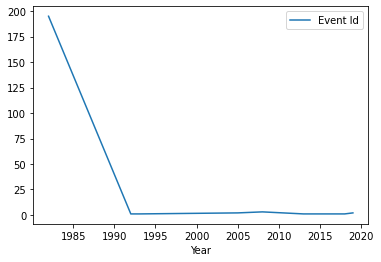

,Year,Event Id
0,1982,195
1,1992,1
2,1993,1
3,2005,2
4,2008,3


In [45]:
# Calculate the number of events that transpired each year and 
# display the results using a line chart. Which year has the highest number of events?
question2 = aviation_df

question2['Year'] = pd.DatetimeIndex(question2['Event Date']).year
question2 = question2.groupby(['Year'], as_index=False)['Event Id'].count()
question2.plot(x='Year', y='Event Id')
plt.show()

question2.head()



In [46]:
# 1982 had the highest number of events 

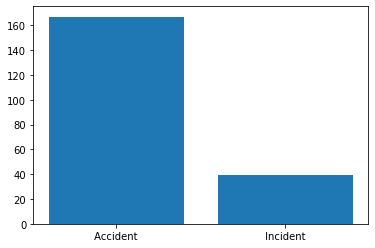

In [47]:
#  Create a suitable visualization that shows the proportion of Accidents and Incidents in the dataset. 
# Hint: use the Investigation Type. Explain the results.

question3 = aviation_df
question3 = question3.groupby(['Investigation Type'], as_index=False)['Event Id'].count()
sumq3 = question3['Event Id'].sum()
plt.bar(question3['Investigation Type'], question3['Event Id'])
plt.show()



In [48]:
# There were around 160 investigations labeled as accidents and there were around 40 investigations 
# labeled as incidents. This means that around 80% were labeled as accidents. 

In [49]:
# Create a suitable visualization that calculates the number of events grouped by the aircraft make 
# (e.g. Cessna, Boeing, Piper, etc).** Visualize which aircraft has the most events; only show the top ten results.
# Comment on the results.

question4 = aviation_df
# replace the mcdonell-douglass, mcdonald douglas that is mispelled with mcdonell douglas
question4["Make"] = question4["Make"].replace(
    {' mcdonnell-douglas ' : ' mcdonnell douglas ',' mcdonald douglas ' : ' mcdonnell douglas ',' douglas ' : ' mcdonnell douglas '})
#lower case everything 
question4['Make'] = question4['Make'].str.lower()
question4 = question4.groupby(['Make'], as_index=False)['Event Id'].count()
# take the top ten results and sort it 
topten_results = question4.sort_values('Event Id', ascending=False).head(10)
topten_results.head(10)



,Make,Event Id
10,cessna,50
28,piper,43
3,beech,20
4,bell,15
35,swearingen,12
6,boeing,11
12,de havilland,9
1,aerospatiale,7
13,douglas,4
21,hughes,3


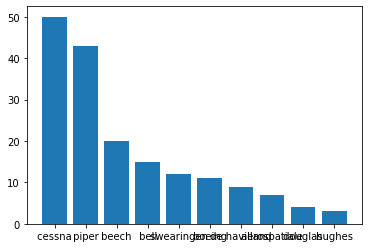

In [50]:
# draw it using a bar graph 
plt.bar(topten_results['Make'], topten_results['Event Id'])
plt.show()

# The top one was Cessna. The bottom one of the ten is hughes. 

In [55]:
# Filter the data and extract all events for the Boeing 737 aircraft (i.e. the make is Boeing and the model is 737)
# **. Create suitable visualizations to answer the following using the extracted data:
# What Phase of Flight did most accidents transpire, and
# Using the Injury Severity variable, determine if most events were fatal or non-fatal? 
# Note: you may need to do additional preparation for the Injury Severity variable.

#question5 = aviation_df
# make lower case 
aviation_df['Make'] = aviation_df['Make'].str.lower()
# filter for the boeing 737 aircraft 
# model is 737
question5 = aviation_df[aviation_df['Model'].str.contains('737')]
# make is boeing 
question5 = question5[aviation_df['Make'] == ' boeing ']

print(question5.head())


              Event Id Investigation Type Event Date          Country  \
3942   20180417X23642           Accident  2018-04-17   United States    
83369  20020917X03240           Incident  1982-08-05   United States    
85297  20020917X02336           Incident  1982-02-15   United States    

       Injury Severity Aircraft Damage Aircraft Category      Make  \
3942                 1    Substantial          Airplane    boeing    
83369                0          Minor          Airplane    boeing    
85297                0          Minor          Airplane    boeing    

            Model                Air Carrier  Total Fatal Injuries  \
3942     737 7H4      SOUTHWEST AIRLINES CO                      1   
83369    737-291    FRONTIER AIRLINES, INC.                      0   
85297   B737-2H4                     AIRCAL                      0   

       Total Serious Injuries  Total Minor Injuries  Total Uninjured  \
3942                        8                   125                6   
8

/var/folders/hg/s6jhgrpn2rqf5f83w73p3mcm0000gn/T/ipykernel_95390/299360758.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  question5 = question5[aviation_df['Make'] == ' boeing ']


   Broad Phase of Flight  Event Id
0              APPROACH          1
1                 CLIMB          1
2                CRUISE          0
3               DESCENT          0
4             GO-AROUND          0
5               LANDING          0
6           MANEUVERING          0
7                 OTHER          0
8              STANDING          0
9               TAKEOFF          1
10                 TAXI          0


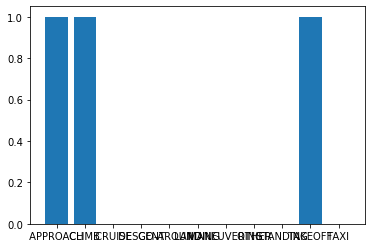

In [69]:
# part 1 
# data is filtered already from above 
q5_part1 = question5

# group it by braod phase of flight 
q5_part1 = q5_part1.groupby(['Broad Phase of Flight'], as_index=False)['Event Id'].count()
print(q5_part1)
# plot 
plt.bar(q5_part1['Broad Phase of Flight'], q5_part1['Event Id'])
plt.show()


In [71]:
# There is only three event in the bar graph with one accident in the approach phase of the flight, one incident in the 
# climb phase of the flight and one incident in the takeoff phase of the flight. Hence, most accidents happened 
# at the approach phase of the fight. 


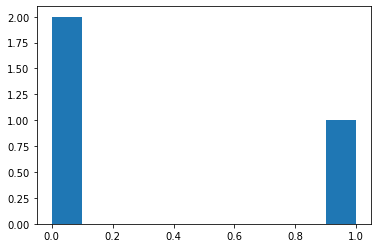

In [72]:
# part 2 
# take filtered data from question5
q5_part2 = question5
# plots it how many times injury severity happens 
plt.hist(q5_part2['Injury Severity'])
plt.show()

In [73]:
# Hence, since there are 2 incidents with zero injury severity, most events were non fatal. 